<a href="https://colab.research.google.com/github/IngerMasha/week9/blob/main/DailyChallenge_AnalyzingTheIMDBMovieDatasetWithMatplotlibSeaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

df = pd.read_csv('/content/imdb_top_1000.csv')

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None
                                

In [ ]:
print(df.isnull().sum())


Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [6]:
df.dropna(inplace=True)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

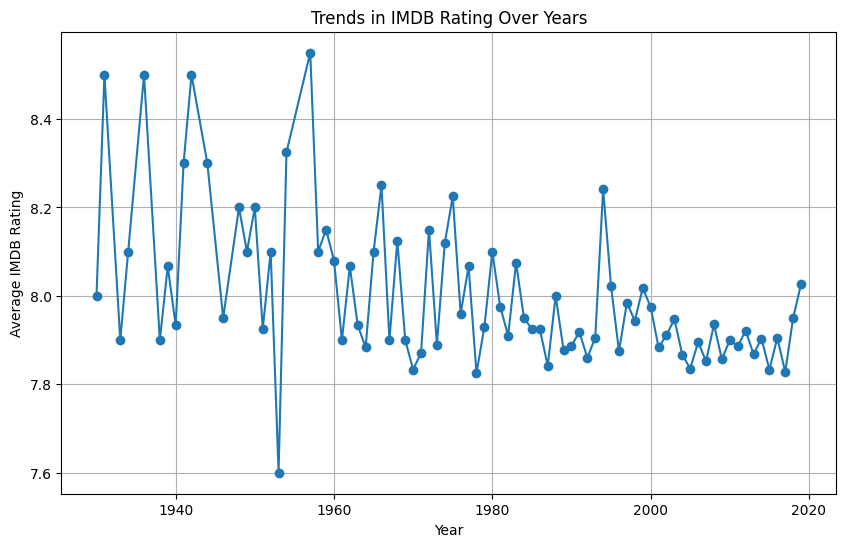

In [7]:
import matplotlib.pyplot as plt

rating_trends = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(rating_trends['Released_Year'], rating_trends['IMDB_Rating'], marker='o')
plt.title('Trends in IMDB Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.grid(True)
plt.show()

<ipython-input-18-5f882528dcf5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')


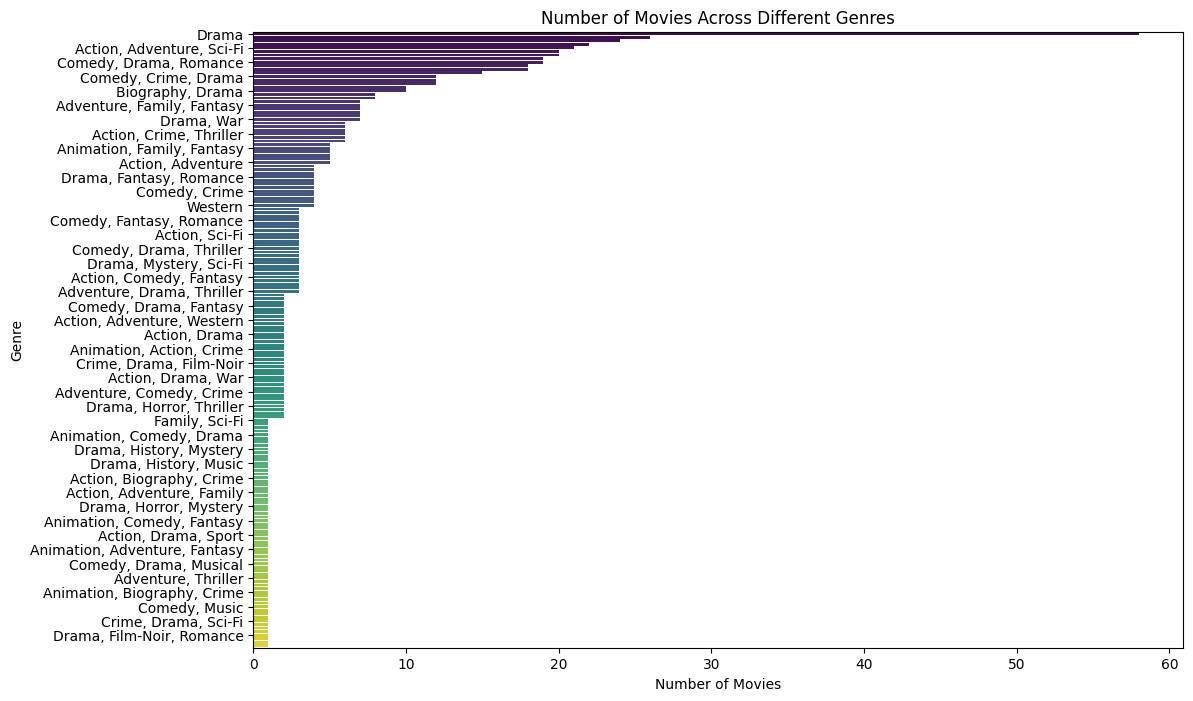

In [18]:
import seaborn as sns

genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')
plt.title('Number of Movies Across Different Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
ax.set_yticks(ax.get_yticks()[::4])  # I made the display of not all the Y axis labels for better readability of the graph
plt.show()
# plt.figure(figsize=(12, 8))
# sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')
# plt.title('Number of Movies Across Different Genres')
# plt.xlabel('Number of Movies')
# plt.ylabel('Genre')
# plt.show()


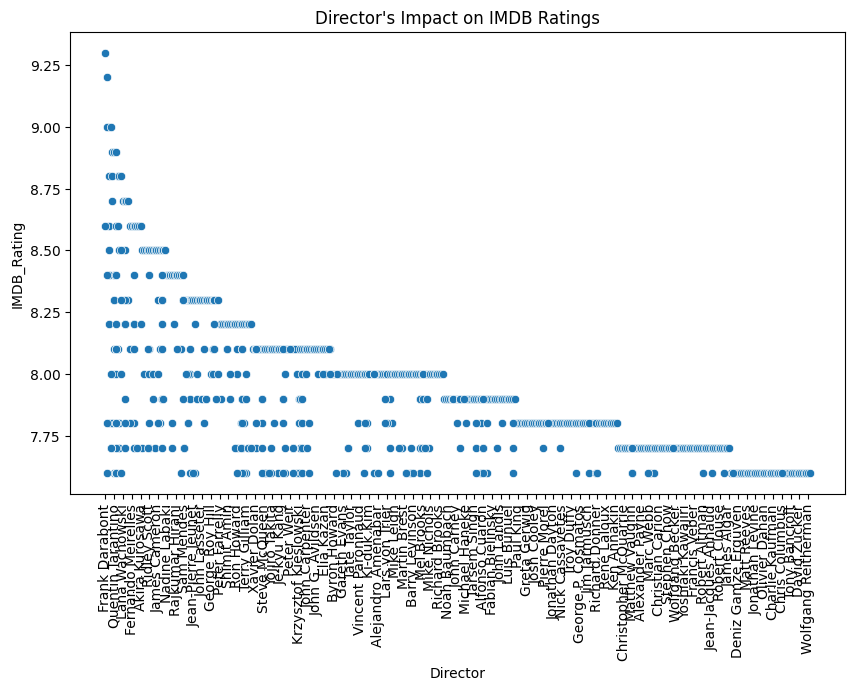

In [22]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Director', y='IMDB_Rating', data=df)
plt.title("Director's Impact on IMDB Ratings")
plt.xticks(rotation=90)
ax.set_xticks(ax.get_xticks()[::5])  # I made the display of not all the X axis labels for better readability of the graph

plt.show()

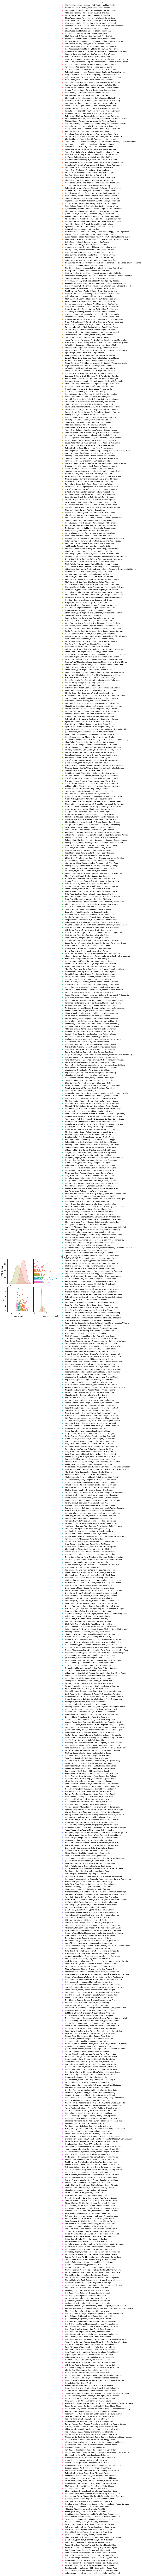

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Stars'] = df[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda x: ', '.join(x), axis=1)
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

sns.pairplot(df, vars=['IMDB_Rating', 'Gross'], hue='Stars')
plt.suptitle("Star Power Analysis", y=1.02)
plt.show()

<ipython-input-31-19a2acbc9b7b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='IMDB_Rating', y='Genre', data=df, palette='coolwarm')


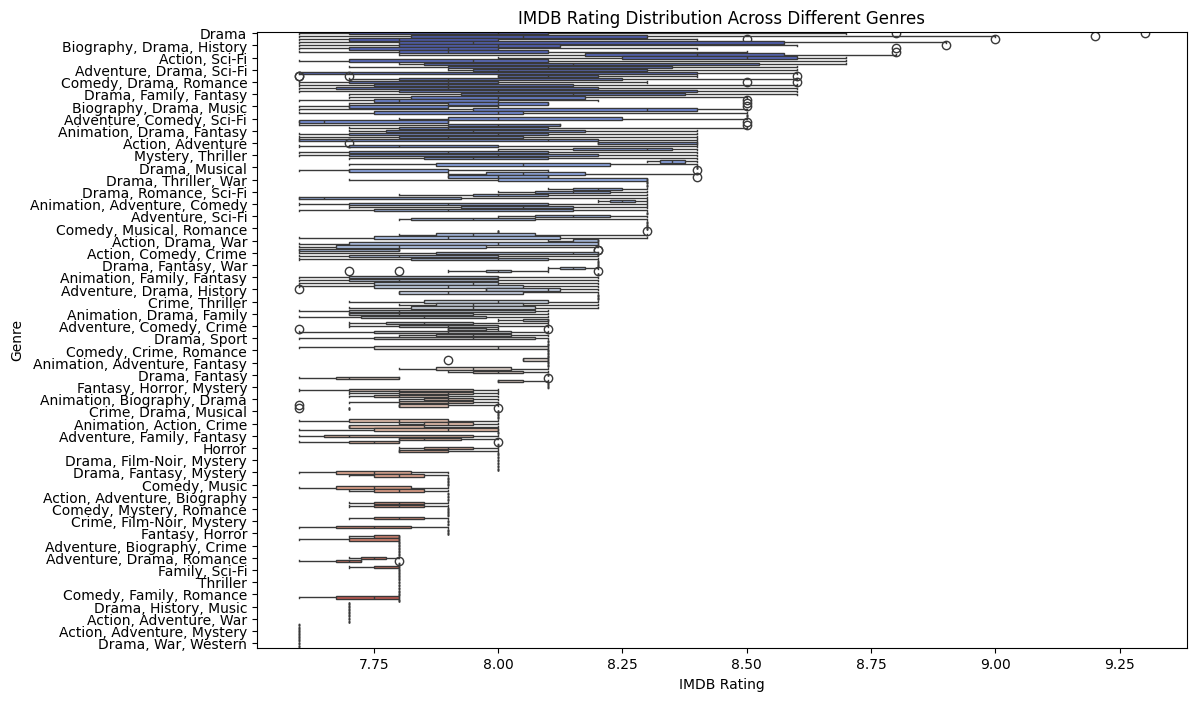

In [31]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='IMDB_Rating', y='Genre', data=df, palette='coolwarm')
plt.title('IMDB Rating Distribution Across Different Genres')
plt.xlabel('IMDB Rating')
plt.ylabel('Genre')
ax.set_yticks(ax.get_yticks()[::4])  # I made the display of not all the Y axis labels for better readability of the graph

plt.show()


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Stars'],
      dtype='object')


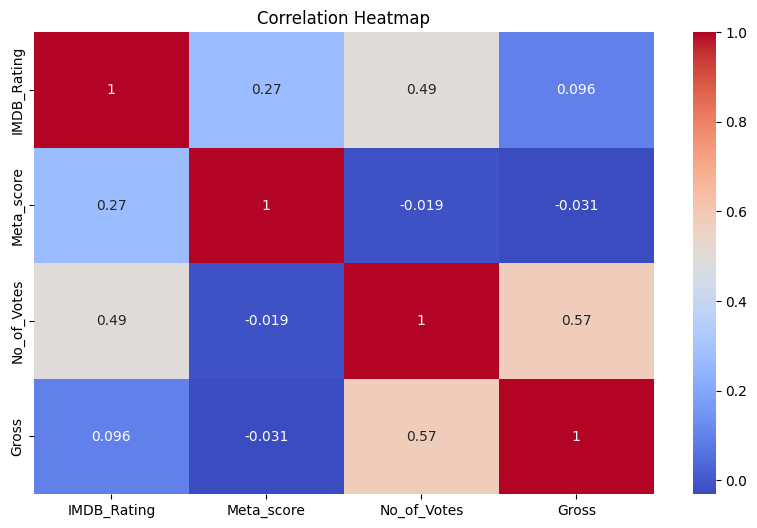

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
print(df.columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()